#EDA of public_labels.csv

## Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Quick EDA

📊 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    816 non-null    object
 1   is_illegal  816 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.9+ KB
None

🔢 Label Distribution:
is_illegal
0    411
1    405
Name: count, dtype: int64

📄 Sample Entries:
             filename  is_illegal
0  session_0003960194           1
1  session_0005840196           0
2  session_0025450757           0
3  session_0029922803           0
4  session_0064281061           1


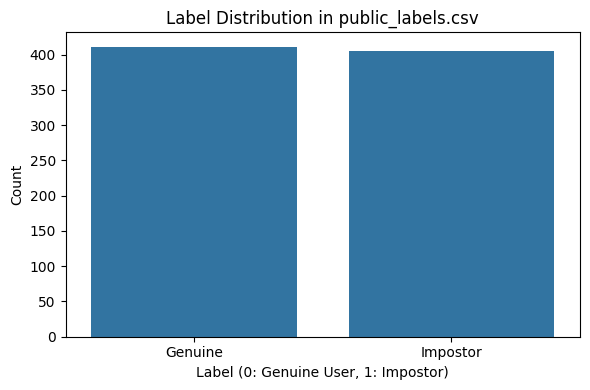

In [2]:
# Load the label file
labels_df = pd.read_csv('/content/drive/MyDrive/Thesis/Mouse-Dynamics-Challenge/public_labels.csv')

# Basic info
print("📊 Basic Info:")
print(labels_df.info())

# Display label distribution (use the correct column name)
print("\n🔢 Label Distribution:")
print(labels_df['is_illegal'].value_counts())

# Show sample entries
print("\n📄 Sample Entries:")
print(labels_df.head())

# Visualize label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=labels_df, x='is_illegal')
plt.title("Label Distribution in public_labels.csv")
plt.xlabel("Label (0: Genuine User, 1: Impostor)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Genuine', 'Impostor'])
plt.tight_layout()
plt.show()

# EDA of training_files

## Import Packages

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Combine All Session Data

In [4]:
# Path to training session folder
train_dir = '/content/drive/MyDrive/Thesis/Mouse-Dynamics-Challenge/training_files'

# Container for all session DataFrames
all_sessions = []

# Loop through each user folder and session file
for user in os.listdir(train_dir):
    user_path = os.path.join(train_dir, user)
    if os.path.isdir(user_path):
        for session_file in os.listdir(user_path):
            session_path = os.path.join(user_path, session_file)
            try:
                df = pd.read_csv(session_path)
                df['user'] = user
                df['session'] = session_file
                all_sessions.append(df)
            except Exception as e:
                print(f"⚠️ Error reading {session_path}: {e}")

# Combine all session data into a single DataFrame
train_df = pd.concat(all_sessions, ignore_index=True)

# Preview
print(train_df.head())

   record timestamp  client timestamp    button state    x    y    user  \
0             0.000             0.000  NoButton  Move  681  694  user35   
1             0.118             0.109  NoButton  Move  570  526  user35   
2             0.216             0.218  NoButton  Move  427  317  user35   
3             0.351             0.343  NoButton  Move  367  241  user35   
4             0.545             0.437  NoButton  Move  349  214  user35   

              session  
0  session_5394017914  
1  session_5394017914  
2  session_5394017914  
3  session_5394017914  
4  session_5394017914  


In [5]:
train_df[train_df["button"]=="Scroll"]

,record timestamp,client timestamp,button,state,x,y,user,session
702,133.634,133.630,Scroll,Down,0,0,user35,session_5394017914
704,133.749,133.755,Scroll,Down,0,0,user35,session_5394017914
706,133.749,133.755,Scroll,Down,0,0,user35,session_5394017914
709,134.079,134.083,Scroll,Down,0,0,user35,session_5394017914
711,134.293,134.161,Scroll,Down,0,0,user35,session_5394017914
...,...,...,...,...,...,...,...,...
2235970,1575.624,1575.610,Scroll,Down,0,0,user20,session_3767642011
2235971,1575.624,1575.610,Scroll,Up,0,0,user20,session_3767642011
2235972,1575.624,1575.641,Scroll,Up,0,0,user20,session_3767642011
2235973,1575.773,1575.657,Scroll,Up,0,0,user20,session_3767642011


In [6]:
train_df[700:720]

,record timestamp,client timestamp,button,state,x,y,user,session
700,133.507,133.396,NoButton,Move,233,604,user35,session_5394017914
701,133.507,133.506,NoButton,Move,302,600,user35,session_5394017914
702,133.634,133.630,Scroll,Down,0,0,user35,session_5394017914
703,133.634,133.630,NoButton,Move,350,602,user35,session_5394017914
704,133.749,133.755,Scroll,Down,0,0,user35,session_5394017914
705,133.749,133.755,NoButton,Move,354,602,user35,session_5394017914
706,133.749,133.755,Scroll,Down,0,0,user35,session_5394017914
707,133.749,133.755,NoButton,Move,370,602,user35,session_5394017914
708,133.855,133.864,NoButton,Move,380,593,user35,session_5394017914
709,134.079,134.083,Scroll,Down,0,0,user35,session_5394017914


In [7]:
train_df["state"].value_counts()

,count
state,
Move,1926971
Drag,79393
Pressed,75978
Released,75978
Down,55303
Up,40193


## Number of sessions per user

In [8]:
# Count unique sessions per user
sessions_per_user = train_df.groupby('user')['session'].nunique().reset_index()
sessions_per_user.columns = ['user', 'num_sessions']

# Sort by number of sessions
sessions_per_user = sessions_per_user.sort_values(by='num_sessions', ascending=False)

# Display
print(sessions_per_user)

     user  num_sessions
0  user12             7
3  user20             7
9   user9             7
4  user21             7
8   user7             7
6  user29             7
1  user15             6
2  user16             6
5  user23             6
7  user35             5


## Average Time per Session

Average session length (minutes): 163.46741666666668
Median session length (minutes): 131.36403333333334
Session length description:
 count     65.000000
mean     163.467417
std       94.053203
min       39.858250
25%       78.741767
50%      131.364033
75%      247.580867
max      432.485733
Name: client timestamp, dtype: float64


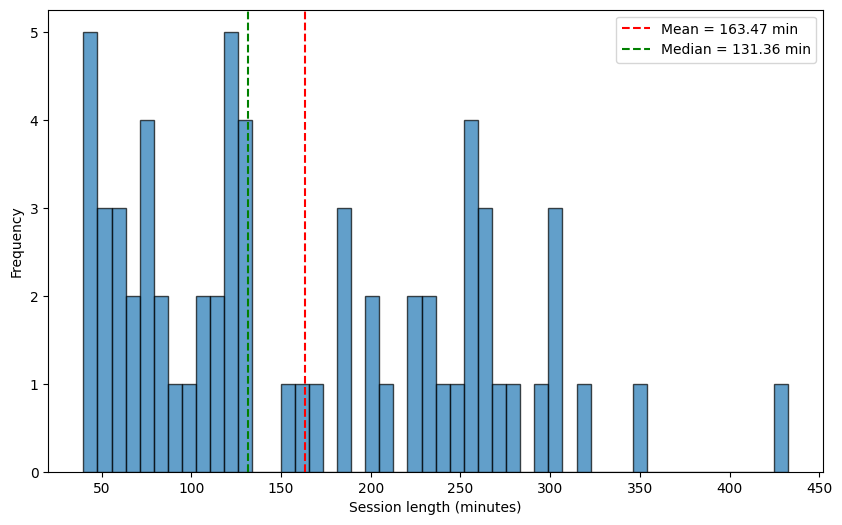

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure timestamp is numeric
train_df['client timestamp'] = pd.to_numeric(train_df['client timestamp'], errors='coerce')

# Drop rows with missing timestamps
train_df = train_df.dropna(subset=['client timestamp'])

# Compute session duration = max timestamp - min timestamp
session_durations = train_df.groupby(['user', 'session'])['client timestamp'].apply(lambda x: x.max() - x.min())

# Convert from seconds → minutes
session_durations = session_durations / 60.0

# Summary statistics
print("Average session length (minutes):", session_durations.mean())
print("Median session length (minutes):", session_durations.median())
print("Session length description:\n", session_durations.describe())

# Plot distribution
plt.figure(figsize=(10,6))
plt.hist(session_durations, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(session_durations.mean(), color='red', linestyle='--', label=f'Mean = {session_durations.mean():.2f} min')
plt.axvline(session_durations.median(), color='green', linestyle='--', label=f'Median = {session_durations.median():.2f} min')
plt.xlabel("Session length (minutes)")
plt.ylabel("Frequency")
plt.legend()

# Save plot
plt.savefig("session_durations_distribution_train.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [ ]:
# Save train_df to CSV
output_path = '/content/drive/MyDrive/Thesis/Code-and-Files/train_events.csv'
train_df.to_csv(output_path, index=False)
print(f"✅ Saved train_df to: {output_path}")

✅ Saved train_df to: /content/drive/MyDrive/Thesis/Code-and-Files/train_events.csv


# EDA of testing_files

## Import Packages

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Number of sessions per user

In [12]:
# Paths
testing_dir = '/content/drive/MyDrive/Thesis/Mouse-Dynamics-Challenge/test_files'
labels_path = '/content/drive/MyDrive/Thesis/Mouse-Dynamics-Challenge/public_labels.csv'

# Load labels
labels_df = pd.read_csv(labels_path)
labels_df['session'] = labels_df['filename'].apply(lambda x: os.path.basename(x))

# Container for test data
test_sessions = []

# Load each test session file and annotate with user/session
for user in os.listdir(testing_dir):
    user_path = os.path.join(testing_dir, user)
    if os.path.isdir(user_path):
        for session_file in os.listdir(user_path):
            session_path = os.path.join(user_path, session_file)
            try:
                df = pd.read_csv(session_path)
                df['user'] = user
                df['session'] = session_file
                test_sessions.append(df)
            except Exception as e:
                print(f"⚠️ Error reading {session_path}: {e}")

# Combine into one DataFrame
test_df = pd.concat(test_sessions, ignore_index=True)

# Strip .csv extension and trim whitespace
test_df['session'] = test_df['session'].str.replace('.csv', '', regex=False).str.strip()
labels_df['session'] = labels_df['session'].str.replace('.csv', '', regex=False).str.strip()

# Merge with labels
test_df = test_df.merge(labels_df[['session', 'is_illegal']], on='session', how='left')

# Check
print(test_df.head())

   record timestamp  client timestamp    button state    x    y    user  \
0             0.000             0.000  NoButton  Move  592  268  user23   
1             0.112             0.110  NoButton  Move  599  219  user23   
2             0.216             0.219  NoButton  Move  640  196  user23   
3             0.216             0.219  NoButton  Move  650  192  user23   
4             0.440             0.312  NoButton  Move  778  159  user23   

              session  is_illegal  
0  session_4199921692         0.0  
1  session_4199921692         0.0  
2  session_4199921692         0.0  
3  session_4199921692         0.0  
4  session_4199921692         0.0  


In [13]:
test_df

,record timestamp,client timestamp,button,state,x,y,user,session,is_illegal
0,0.000,0.000,NoButton,Move,592,268,user23,session_4199921692,0.0
1,0.112,0.110,NoButton,Move,599,219,user23,session_4199921692,0.0
2,0.216,0.219,NoButton,Move,640,196,user23,session_4199921692,0.0
3,0.216,0.219,NoButton,Move,650,192,user23,session_4199921692,0.0
4,0.440,0.312,NoButton,Move,778,159,user23,session_4199921692,0.0
...,...,...,...,...,...,...,...,...,...
2356108,211.278,211.288,NoButton,Move,290,275,user29,session_1778570235,0.0
2356109,211.278,211.288,NoButton,Move,289,266,user29,session_1778570235,0.0
2356110,211.471,211.475,NoButton,Move,289,264,user29,session_1778570235,0.0
2356111,211.471,211.475,Left,Pressed,289,264,user29,session_1778570235,0.0


In [14]:
unmatched = test_df[test_df['is_illegal'].isna()]['session'].unique()
print("Unmatched sessions:", unmatched)
print(f"Total unmatched sessions: {len(unmatched)}")

Unmatched sessions: ['session_0948424341' 'session_8814562521' 'session_2842773149'
 'session_5004329223' 'session_9748111038' 'session_3366295190'
 'session_2213263833' 'session_7568549928' 'session_0926211887'
 'session_9968528235' 'session_0576615536' 'session_1432891120'
 'session_7801315876' 'session_8948429343' 'session_2637707773'
 'session_4241020783' 'session_8787338881' 'session_3643463565'
 'session_7320901791' 'session_2017009916' 'session_2055621452'
 'session_3209618709' 'session_5159663602' 'session_9848805379'
 'session_4642510935' 'session_6751640584' 'session_1979239683'
 'session_7370776941' 'session_9456595853' 'session_5607181241'
 'session_2413552638' 'session_3362260271' 'session_9356695708'
 'session_2818892615' 'session_6813458308' 'session_5405991199'
 'session_9838364022' 'session_9803043352' 'session_0672015823'
 'session_4024579182' 'session_0466343682' 'session_0104431977'
 'session_8562565734' 'session_8109563694' 'session_1645472813'
 'session_9686472520

In [15]:
print(test_df.isnull().sum())

record timestamp          0
client timestamp          0
button                    0
state                     0
x                         0
y                         0
user                      0
session                   0
is_illegal          1198290
dtype: int64


In [16]:
test_df = test_df.dropna(subset=['is_illegal']).reset_index(drop=True)

In [17]:
test_df

,record timestamp,client timestamp,button,state,x,y,user,session,is_illegal
0,0.000,0.000,NoButton,Move,592,268,user23,session_4199921692,0.0
1,0.112,0.110,NoButton,Move,599,219,user23,session_4199921692,0.0
2,0.216,0.219,NoButton,Move,640,196,user23,session_4199921692,0.0
3,0.216,0.219,NoButton,Move,650,192,user23,session_4199921692,0.0
4,0.440,0.312,NoButton,Move,778,159,user23,session_4199921692,0.0
...,...,...,...,...,...,...,...,...,...
1157818,211.278,211.288,NoButton,Move,290,275,user29,session_1778570235,0.0
1157819,211.278,211.288,NoButton,Move,289,266,user29,session_1778570235,0.0
1157820,211.471,211.475,NoButton,Move,289,264,user29,session_1778570235,0.0
1157821,211.471,211.475,Left,Pressed,289,264,user29,session_1778570235,0.0


## Count Genuine and Impostor

In [18]:
# Count unique sessions per user and is_illegal label
session_counts = (
    test_df.groupby(['user', 'is_illegal'])['session']
    .nunique()
    .reset_index()
    .pivot(index='user', columns='is_illegal', values='session')
    .fillna(0)
    .astype(int)
)

# Rename columns for clarity
session_counts.columns = ['genuine_sessions', 'impostor_sessions']

# Optional: sort by user or impostor count
session_counts = session_counts.sort_index()

# Display
print(session_counts)

        genuine_sessions  impostor_sessions
user                                       
user12                56                 49
user15                45                 70
user16                68                 38
user20                30                 20
user21                37                 22
user23                38                 33
user29                43                 20
user35                35                 73
user7                 36                 37
user9                 23                 43


## Average Time per Session

Average session length (minutes): 8.718506842320263
Median session length (minutes): 5.623708333333333
Session length description:
 count    816.000000
mean       8.718507
std       11.333195
min        0.364783
25%        3.068092
50%        5.623708
75%       10.233725
max      121.956117
Name: client timestamp, dtype: float64


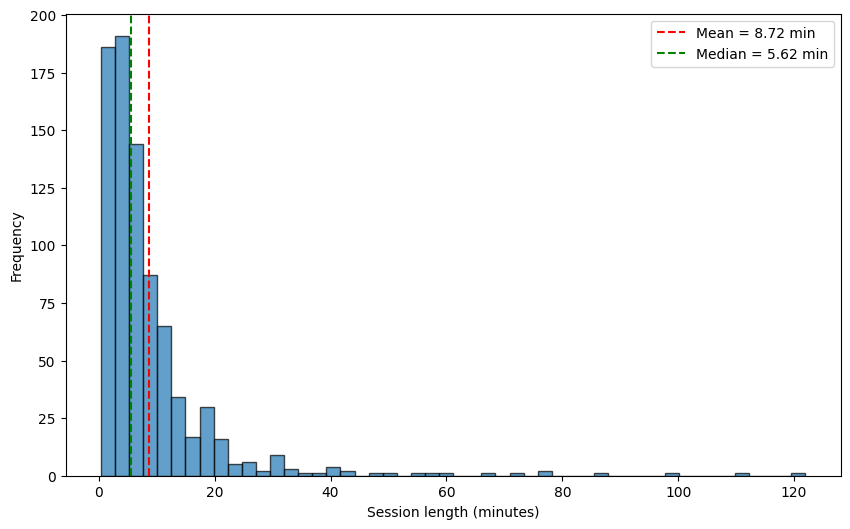

In [20]:
# Compute session duration = max timestamp - min timestamp
session_durations = test_df.groupby(['user', 'session'])['client timestamp'].apply(lambda x: x.max() - x.min())

# Convert from seconds → minutes
session_durations = session_durations / 60.0

# Summary statistics
print("Average session length (minutes):", session_durations.mean())
print("Median session length (minutes):", session_durations.median())
print("Session length description:\n", session_durations.describe())

# Plot distribution
plt.figure(figsize=(10,6))
plt.hist(session_durations, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(session_durations.mean(), color='red', linestyle='--', label=f'Mean = {session_durations.mean():.2f} min')
plt.axvline(session_durations.median(), color='green', linestyle='--', label=f'Median = {session_durations.median():.2f} min')
plt.xlabel("Session length (minutes)")
plt.ylabel("Frequency")
plt.legend()

# Save plot
plt.savefig("session_durations_distribution_test.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [ ]:
# Save test_df to CSV
output_path = '/content/drive/MyDrive/Thesis/Code-and-Files/test_events.csv'
test_df.to_csv(output_path, index=False)
print(f"✅ Saved test_df to: {output_path}")

✅ Saved test_df to: /content/drive/MyDrive/Thesis/Code-and-Files/test_events.csv


# EDA of Margit Antal's processed data

In [ ]:
antal_train = pd.read_csv('/content/drive/MyDrive/Thesis/Margit Antal/balabit_features_training.csv')
antal_test = pd.read_csv('/content/drive/MyDrive/Thesis/Margit Antal/balabit_features_test.csv')

1. Drag Drop Action (4)
2. Point Click Action (3)
3. MM (1)



In [ ]:
antal_train

,type_of_action,traveled_distance_pixel,elapsed_time,direction_of_movement,straightness,num_points,sum_of_angles,mean_curv,sd_curv,max_curv,...,min_a,mean_jerk,sd_jerk,max_jerk,min_jerk,a_beg_time,class,session,n_from,n_to
0,1,2596.537181,9.329,3,0.198032,82,56.525861,-0.085272,0.527422,1.091459,...,-39709.272111,2.782076e+06,9.098249e+06,4.310787e+07,-4.296965e+06,0.104,12,2144641057,2,83
1,4,179.260212,1.919,2,0.959645,14,11.255258,-0.235679,0.916836,0.314159,...,-2236.991291,3.568473e+04,1.317088e+05,4.741526e+05,-1.752299e+04,0.453,12,2144641057,84,97
2,1,887.903498,2.137,7,0.979540,21,-14.268377,-0.078308,0.112436,0.261799,...,-11229.266842,1.647814e+06,4.402917e+06,1.552340e+07,-1.454711e+06,0.144,12,2144641057,98,118
3,4,75.035669,1.358,7,0.999613,7,-0.071307,-0.000650,0.002580,0.001828,...,-509.374253,5.327320e+03,1.416589e+04,3.006290e+04,-8.510673e+03,0.250,12,2144641057,119,125
4,3,1078.673940,3.541,4,0.949591,27,-24.025555,-0.040986,0.174415,0.249828,...,-9285.424792,1.806130e+04,1.140981e+05,5.489531e+05,-8.135115e+04,0.327,12,2144641057,126,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60900,3,302.516225,1.092,5,0.921743,109,-177.741080,-0.000784,0.224219,0.785398,...,-28896.015499,2.592510e+05,1.879115e+06,6.410918e+06,-4.003891e+06,0.025,9,8764610836,55773,55883
60901,3,713.708989,1.326,0,0.693086,116,112.627803,-0.000823,0.271832,1.570796,...,-72916.922685,4.490074e+05,4.066317e+06,1.748353e+07,-1.166592e+07,0.026,9,8764610836,55884,56001
60902,3,722.001488,1.185,4,0.978713,115,-268.263579,0.012768,0.662992,4.712389,...,-72519.391490,6.028919e+05,4.900945e+06,1.762142e+07,-1.165433e+07,0.035,9,8764610836,56002,56118
60903,3,516.752489,1.372,5,0.765938,117,-70.617559,0.021511,1.093675,5.497787,...,-110384.048104,3.876980e+05,3.840811e+06,1.256165e+07,-2.343851e+07,0.041,9,8764610836,56251,56370


In [ ]:
antal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60905 entries, 0 to 60904
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type_of_action           60905 non-null  int64  
 1   traveled_distance_pixel  60905 non-null  float64
 2   elapsed_time             60905 non-null  float64
 3   direction_of_movement    60905 non-null  int64  
 4   straightness             60905 non-null  float64
 5   num_points               60905 non-null  int64  
 6   sum_of_angles            60905 non-null  float64
 7   mean_curv                60905 non-null  float64
 8   sd_curv                  60905 non-null  float64
 9   max_curv                 60905 non-null  float64
 10  min_curv                 60905 non-null  float64
 11  mean_omega               60905 non-null  float64
 12  sd_omega                 60905 non-null  float64
 13  max_omega                60905 non-null  float64
 14  min_omega             

/tmp/ipython-input-6-3689980486.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=antal_train, x='action_label', y='elapsed_time', palette='pastel')


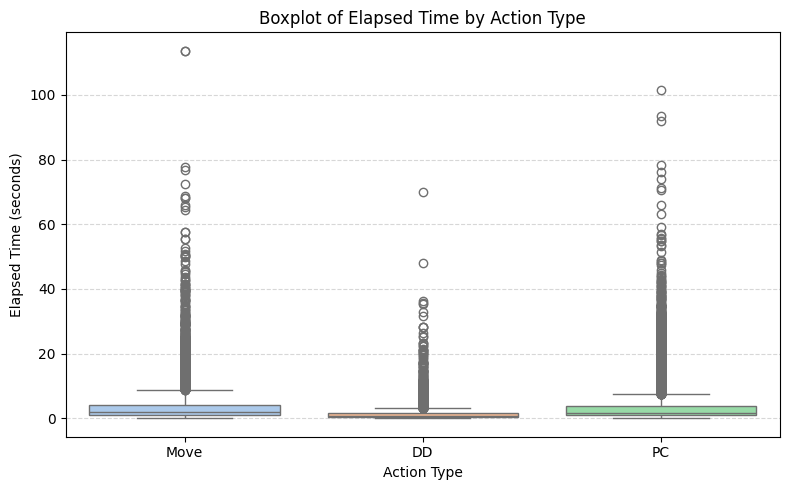

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Map numeric codes to readable labels
label_map = {1: 'Move', 3: 'PC', 4: 'DD'}
antal_train['action_label'] = antal_train['type_of_action'].map(label_map)

# Set plot style
plt.figure(figsize=(8, 5))
sns.boxplot(data=antal_train, x='action_label', y='elapsed_time', palette='pastel')

plt.title("Boxplot of Elapsed Time by Action Type")
plt.xlabel("Action Type")
plt.ylabel("Elapsed Time (seconds)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Mean Elapsed Time

In [ ]:
# Map numeric codes to labels
label_map = {1: 'Move', 3: 'PC', 4: 'DD'}
antal_train['action_label'] = antal_train['type_of_action'].map(label_map)

# Compute average elapsed_time for each action of Train dataset
avg_elapsed = antal_train.groupby('action_label')['elapsed_time'].mean().round(3)
print("Average elapsed_time by action:")
print(avg_elapsed)

Average elapsed_time by action:
action_label
DD      1.448
Move    3.687
PC      3.239
Name: elapsed_time, dtype: float64


In [ ]:
# Map numeric codes to labels
label_map = {1: 'Move', 3: 'PC', 4: 'DD'}
antal_test['action_label'] = antal_test['type_of_action'].map(label_map)

# Compute average elapsed_time for each action of Test dataset
avg_elapsed = antal_test.groupby('action_label')['elapsed_time'].mean().round(3)
print("Average elapsed_time by action:")
print(avg_elapsed)

Average elapsed_time by action:
action_label
DD      1.324
Move    3.480
PC      2.937
Name: elapsed_time, dtype: float64


## Median Elapsed Time

In [ ]:
# Map numeric codes to labels
label_map = {1: 'Move', 3: 'PC', 4: 'DD'}
antal_train['action_label'] = antal_train['type_of_action'].map(label_map)

# Compute median elapsed_time for each action of Train dataset
mean_elapsed = antal_train.groupby('action_label')['elapsed_time'].median().round(3)
print("Mean elapsed_time by action:")
print(mean_elapsed)

Mean elapsed_time by action:
action_label
DD      0.811
Move    1.872
PC      1.732
Name: elapsed_time, dtype: float64


In [ ]:
# Map numeric codes to labels
label_map = {1: 'Move', 3: 'PC', 4: 'DD'}
antal_test['action_label'] = antal_test['type_of_action'].map(label_map)

# Compute median elapsed_time for each action of Test dataset
mean_elapsed = antal_test.groupby('action_label')['elapsed_time'].median().round(3)
print("Mean elapsed_time by action:")
print(mean_elapsed)

Mean elapsed_time by action:
action_label
DD      0.764
Move    1.826
PC      1.607
Name: elapsed_time, dtype: float64
